In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import time, datetime

In [2]:
data=pd.read_csv('./Ordinal_Encoding.csv')

<Axes: xlabel='price'>

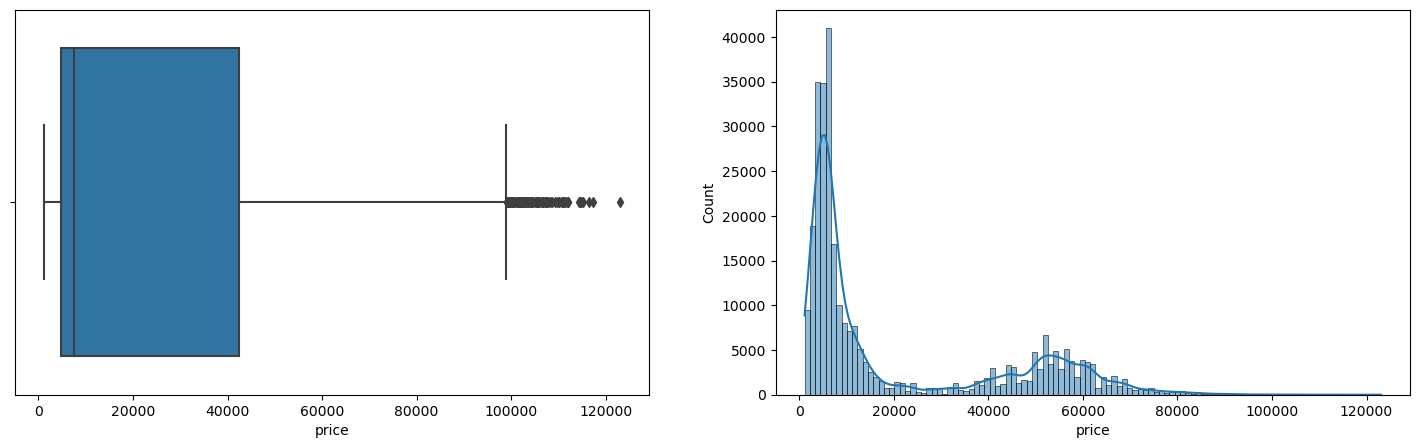

In [3]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = data, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = data)

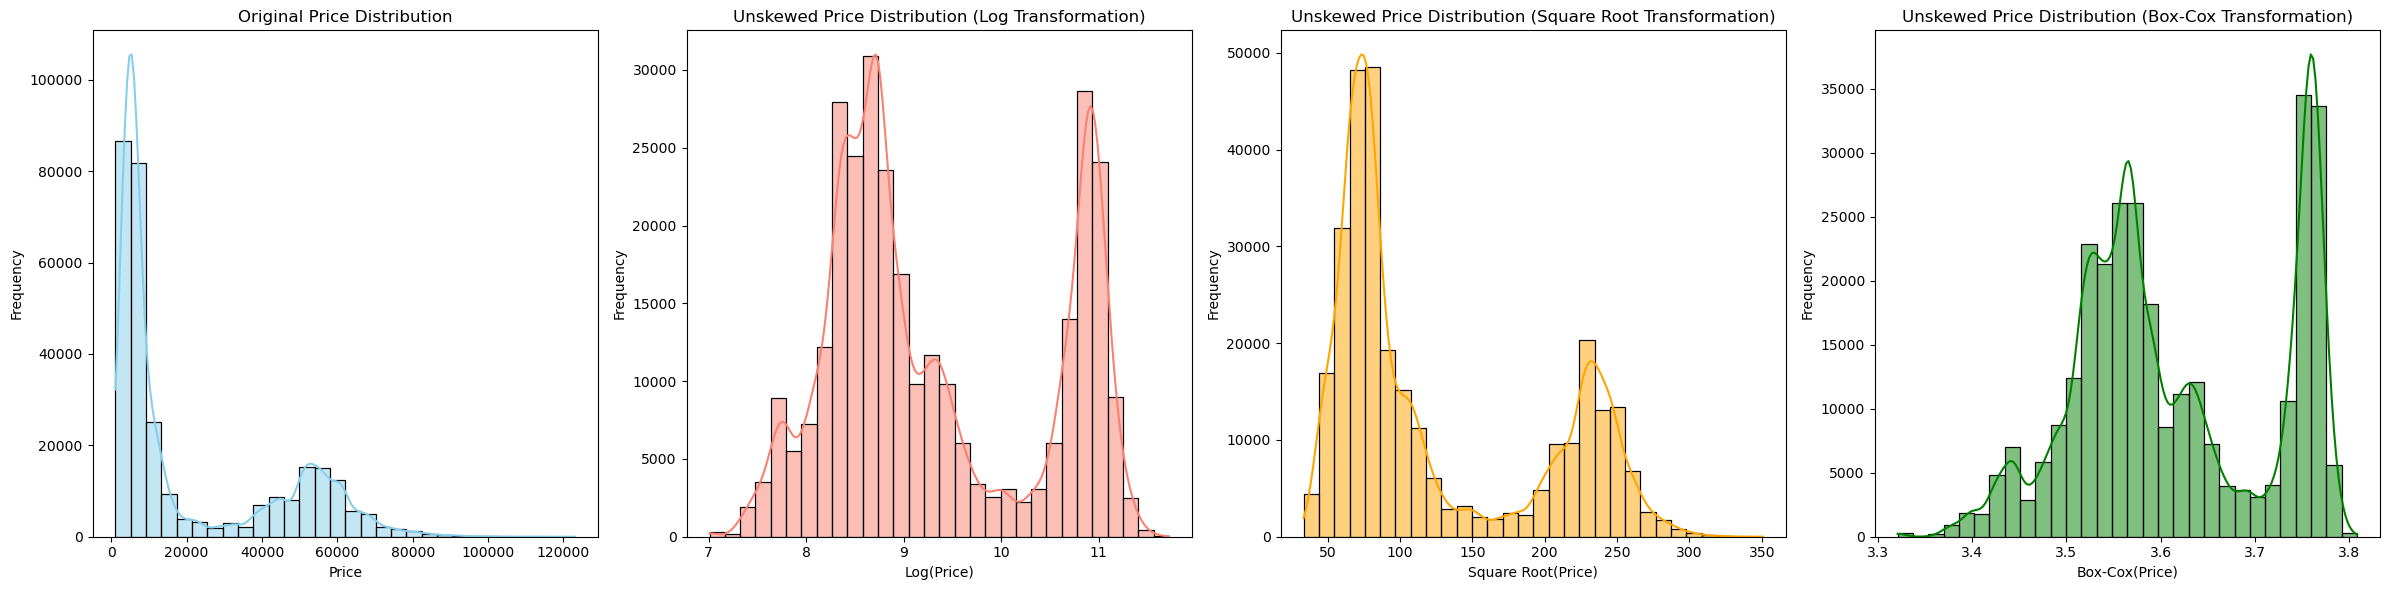

In [4]:
data['price_unskewed_boxcox'], _ = boxcox(data['price'])
data['price_unskewed_sqrt'] = np.sqrt(data['price'])
data['price_unskewed'] = np.log(data['price'])

# Visualize the original and transformed distributions
plt.figure(figsize=(24, 6))  # Increase the figure size for better visualization

# Original distribution
plt.subplot(1, 4, 1)  # Adjust the subplot layout to accommodate four plots
sns.histplot(data=data, x='price', kde=True, color='skyblue', bins=30)
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Logarithmic transformation
plt.subplot(1, 4, 2)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed', kde=True, color='salmon', bins=30)
plt.title('Unskewed Price Distribution (Log Transformation)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Square root transformation
plt.subplot(1, 4, 3)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed_sqrt', kde=True, color='orange', bins=30)
plt.title('Unskewed Price Distribution (Square Root Transformation)')
plt.xlabel('Square Root(Price)')
plt.ylabel('Frequency')

# Box-Cox transformation
plt.subplot(1, 4, 4)  # Adjust the subplot layout
sns.histplot(data=data, x='price_unskewed_boxcox', kde=True, color='green', bins=30)
plt.title('Unskewed Price Distribution (Box-Cox Transformation)')
plt.xlabel('Box-Cox(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
data.describe(include='all')

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,class,...,days_left,price,dest_city_id,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,price_unskewed_boxcox,price_unskewed_sqrt,price_unskewed
count,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,299999.000000,...,299999.000000,299999.000000,299999.000000,2.999990e+05,299999.000000,299999.000000,2.999990e+05,299999.000000,299999.000000,299999.000000
mean,2.955153,3.741732,2.577365,12.982760,1.833573,0.924673,15.241217,2.584475,2.587989,0.688376,...,26.005763,20897.897916,2.419965,-2.829035e-02,-0.252139,-0.275697,-5.301239e-03,3.615940,124.717163,9.331101
std,2.003258,3.002821,1.751668,5.362041,1.378340,0.397794,6.047971,1.359204,1.744774,0.463158,...,13.558573,22700.630886,1.783123,7.882493e-01,0.560617,0.669709,6.895334e-01,0.106667,73.099555,1.112784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1105.000000,0.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00,3.320737,33.241540,7.007601
25%,1.000000,0.000000,1.000000,8.000000,1.000000,1.000000,10.000000,1.000000,1.000000,0.000000,...,15.000000,4783.000000,1.000000,-8.660254e-01,-0.707107,-0.866025,-7.071068e-01,3.536376,69.159237,8.472823
50%,3.000000,3.000000,2.000000,12.000000,2.000000,1.000000,17.000000,2.000000,3.000000,1.000000,...,26.000000,7425.000000,2.000000,1.224647e-16,-0.258819,-0.500000,-1.836970e-16,3.587213,86.168440,8.912608
75%,5.000000,7.000000,4.000000,18.000000,3.000000,1.000000,20.000000,4.000000,4.000000,1.000000,...,38.000000,42521.000000,4.000000,8.660254e-01,0.258819,0.258819,7.071068e-01,3.742152,206.206207,10.657753
max,6.000000,7.000000,5.000000,23.000000,5.000000,2.000000,23.000000,5.000000,5.000000,1.000000,...,49.000000,123071.000000,5.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,3.808413,350.814766,11.720517


In [6]:
data

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,class,...,days_left,price,dest_city_id,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos,price_unskewed_boxcox,price_unskewed_sqrt,price_unskewed
0,4,4,2,18,2,0,21,4,5,1,...,1,5953,0,-1.000000e+00,-1.836970e-16,-7.071068e-01,7.071068e-01,3.562365,77.155687,8.691651
1,4,4,2,6,0,0,8,1,5,1,...,1,5953,0,1.000000e+00,6.123234e-17,8.660254e-01,-5.000000e-01,3.562365,77.155687,8.691651
2,4,1,2,4,0,0,6,0,5,1,...,1,5956,0,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17,3.562423,77.175126,8.692154
3,4,7,2,10,1,0,12,3,5,1,...,1,5955,0,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00,3.562404,77.168646,8.691986
4,4,7,2,8,1,0,11,1,5,1,...,1,5955,0,8.660254e-01,-5.000000e-01,2.588190e-01,-9.659258e-01,3.562404,77.168646,8.691986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,3,7,1,9,1,1,19,2,3,0,...,49,69265,3,7.071068e-01,-7.071068e-01,-9.659258e-01,2.588190e-01,3.774750,263.182446,11.145695
299995,3,7,1,12,3,1,22,4,3,0,...,49,77105,3,1.224647e-16,-1.000000e+00,-5.000000e-01,8.660254e-01,3.781399,277.677871,11.252923
299996,3,7,1,7,0,1,20,4,3,0,...,49,79099,3,9.659258e-01,-2.588190e-01,-8.660254e-01,5.000000e-01,3.782957,281.245444,11.278456
299997,3,7,1,7,0,1,17,2,3,0,...,49,81585,3,9.659258e-01,-2.588190e-01,-9.659258e-01,-2.588190e-01,3.784831,285.630881,11.309401


In [7]:
data.drop(['price_unskewed_sqrt','price_unskewed','price'], axis=1, inplace=True)

In [8]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'dest_city_id',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox'],
      dtype='object')

Feature ranking:
1. feature 9 (0.810172)
2. feature 11 (0.090551)
3. feature 10 (0.054386)
4. feature 1 (0.033343)
5. feature 2 (0.003379)
6. feature 5 (0.002413)
7. feature 12 (0.001758)
8. feature 8 (0.001459)
9. feature 6 (0.000804)
10. feature 15 (0.000547)
11. feature 3 (0.000467)
12. feature 0 (0.000295)
13. feature 14 (0.000258)
14. feature 13 (0.000077)
15. feature 16 (0.000055)
16. feature 7 (0.000036)
17. feature 4 (0.000000)


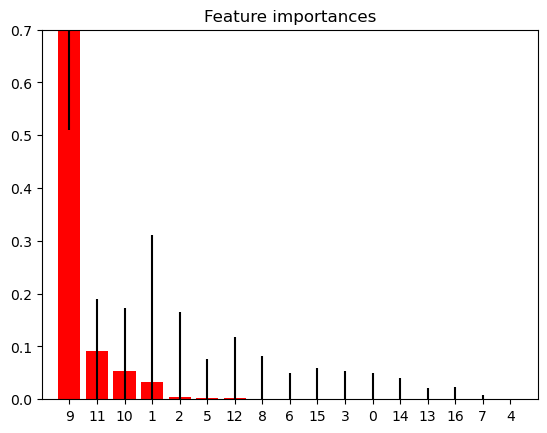

In [9]:
# Feature Importance using ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
# Build an estimator and compute the feature importances
estimator = GradientBoostingRegressor(n_estimators=100, random_state=0)
# X = data.values[:,9:-1]
# y = data.values[:,-1]
X = data.values[:,0:-1]
y = data.values[:,-1]
estimator.fit(X,y)
# Lets get the feature importances.
# Features with high importance score higher.
importances = estimator.feature_importances_
std = np.std([tree[0].feature_importances_ for tree in estimator.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
 print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.7])
plt.show()


In [10]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'dest_city_id',
       'departure_hour_sin', 'departure_hour_cos', 'arrival_hour_sin',
       'arrival_hour_cos', 'price_unskewed_boxcox'],
      dtype='object')

In [11]:
data[['class', 'duration', 'days_left']].values

array([[  1, 130,   1],
       [  1, 140,   1],
       [  1, 130,   1],
       ...,
       [  0, 830,  49],
       [  0, 600,  49],
       [  0, 605,  49]], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Assuming X contains the features 'class', 'duration', 'days_left' and y contains the target variable 'price_unskewed_boxcox'
# X_best =  data[['class', 'duration', 'days_left']].values
# Split the data into training and testing sets
# n_est_val = [50,100,150,200,300,400]
# for n in n_est_val:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=0)

# # Fit the model
# rf_regressor.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_regressor.predict(X_test)

# # Calculate the accuracy of the model using Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# accuracy = 1 - mse

# # Print the accuracy
# print("Accuracy of the RandomForest Regression model:", accuracy)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_rf_regressor = grid_search.best_estimator_
  
# Evaluate the best model on the test set
y_pred = best_rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


KeyboardInterrupt: 

In [ ]:
from scipy.special import inv_boxcox
# inv_boxcox(y_test,_)

In [ ]:
results_pred = inv_boxcox(y_pred,_)
print("    Y_TEST            Y_RESULTS_PRED ")
print("_______________________________________")
for i in range(50):
    print(inv_boxcox(y_test,_)[i], ": " ,results_pred[i])

In [ ]:
# import matplotlib.pyplot as plt
y_real_test = inv_boxcox(y_test,_)
y_real_pred = results_pred
# Scatter plot of actual vs. predicted values
plt.scatter(y_real_test, y_real_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted values")
plt.show()


In [ ]:
# Residual plot
residuals = y_real_test - y_real_pred
plt.scatter(y_real_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()


In [ ]:
# Distribution of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [ ]:
# Density Plot of Predicted and Actual Values
sns.kdeplot(y_real_test, label='Actual', shade=True)
sns.kdeplot(y_real_pred, label='Predicted', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Predicted and Actual Values')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(y_real_test, label='Actual')
plt.plot(y_real_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()
